# Preprocessing

In [76]:
import torch.nn as nn
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import heapq
import re
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [77]:
df = pd.read_csv("train/train.csv")
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


## Feature Analysis

In [62]:
df['text_length'] = df["text"].apply(lambda x: len(x.split()))
author_names = df['author'].unique()
authors_df_list = []
word_summary = []
for author in author_names:
    author_df = df[df['author'] == author].rename(columns={'text_length' : f"{author}_text_length"})
    top_ten_word_counts = heapq.nlargest(10, author_df[f"{author}_text_length"])
    print(f"The highest 10 word counts from {author} were {top_ten_word_counts}.")
    authors_df_list.append(author_df)
    word_summary.append(author_df[f"{author}_text_length"].describe())
word_summary_df = pd.concat(word_summary, axis=1)
word_summary_df

The highest 10 word counts from EAP were [267, 256, 169, 164, 157, 149, 148, 148, 140, 137].
The highest 10 word counts from HPL were [147, 134, 117, 113, 113, 108, 102, 102, 100, 99].
The highest 10 word counts from MWS were [861, 594, 445, 377, 335, 191, 190, 186, 186, 181].


,EAP_text_length,HPL_text_length,MWS_text_length
count,7900.000000,5635.000000,6044.000000
mean,25.442405,27.799645,27.417273
std,18.567706,14.123252,23.134440
min,2.000000,4.000000,2.000000
25%,12.000000,18.000000,15.000000
50%,21.000000,26.000000,23.000000
75%,33.000000,35.000000,34.000000
max,267.000000,147.000000,861.000000


In [ ]:
max_word_count = 169
for i, author in enumerate(author_names):
    initial_count = len(authors_df_list[i])
    authors_df_list[i] = authors_df_list[i][authors_df_list[i][f'{author}_text_length'] <= max_word_count]
    print(f"{author} had {initial_count - len(authors_df_list[i])} texts with more than {max_word_count} words. ")

EAP had 2 texts with more than 169 words. 
HPL had 0 texts with more than 169 words. 
MWS had 11 texts with more than 169 words. 


It is important to note that most of these samples fall within the range of 169. This means that we should remove the 13 entries (2 from EAP and 11 from MWS) that have more than 169 entries and consider them outliers. 

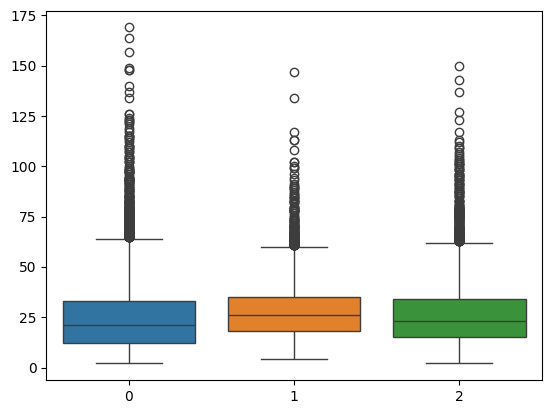

In [ ]:
#TODO: rename below variable
word_list = []
for i, author in enumerate(author_names):
    word_list.append(authors_df_list[i][f"{author}_text_length"].values)
_ = sns.boxplot(data=word_list)

## Preprocessing

In [93]:
def one_hot_encode(df) :
    labels = df["author"]
    df = df.drop(columns=["id", "author"])

    # Remove punctuation
    to_remove = ['.', ',', '?', '!', ':', ';']
    replacement = " "

    pattern = "|".join(map(re.escape, to_remove))
    df["text"] = df["text"].str.replace(pattern, replacement, regex=True)

    # Tokenization
    vectorizer = CountVectorizer(lowercase=True, binary=True) # Binary makes values 0/1
    X = vectorizer.fit_transform(df["text"])
    print(X.shape)
    onehot_df = pd.DataFrame(X)

    return onehot_df, labels

p , _ = one_hot_encode(df)

(19579, 25068)
0        EAP
1        HPL
2        EAP
3        MWS
4        HPL
        ... 
19574    EAP
19575    EAP
19576    EAP
19577    EAP
19578    HPL
Name: author, Length: 19579, dtype: object


# Model Definition

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(25068, 5)
        self.fc2 = nn.Linear(5, 3)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
 
# Create an instance of the network
net = Net()
model = nn.Linear(25068, 32)

[]